In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
df = pd.read_csv('E:/FinancialDataMining/data/ozone.csv')

In [4]:
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [7]:
df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [8]:
df.describe().round(3)

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000,146.000,153.000,153.000,153.000,153.000
mean,42.129,185.932,9.958,77.882,6.993,15.804
std,32.988,90.058,3.523,9.465,1.417,8.865
min,1.000,7.000,1.700,56.000,5.000,1.000
25%,18.000,115.750,7.400,72.000,6.000,8.000
50%,31.500,205.000,9.700,79.000,7.000,16.000
75%,63.250,258.750,11.500,85.000,8.000,23.000
max,168.000,334.000,20.700,97.000,9.000,31.000


In [9]:
df['Ozone'] = df['Ozone'].fillna(df['Ozone'].mean())

In [12]:
df['Solar.R'] = df['Solar.R'].fillna(df['Solar.R'].mean())

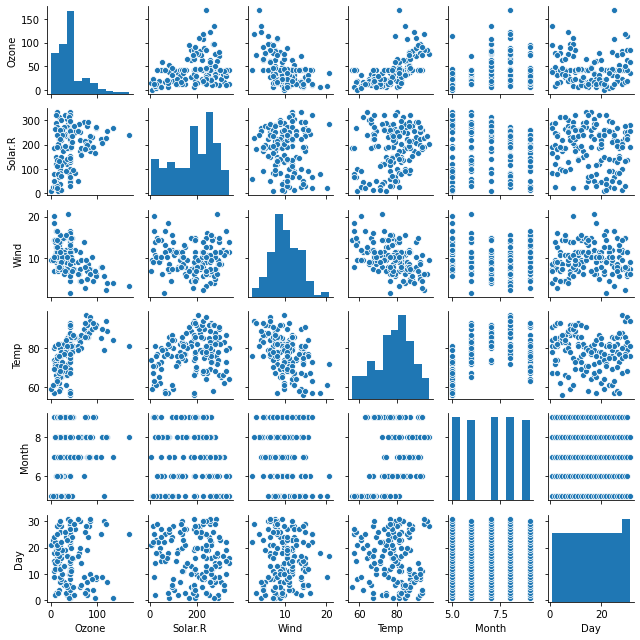

In [16]:
sns.pairplot(df, height = 1.5)
plt.tight_layout()
plt.show()

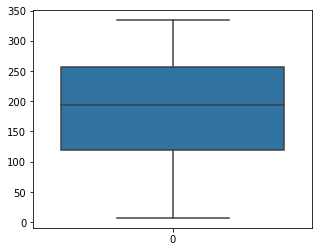

In [18]:
plt.figure(figsize = (5,4))
sns.boxplot(data = df['Solar.R'])
plt.show()

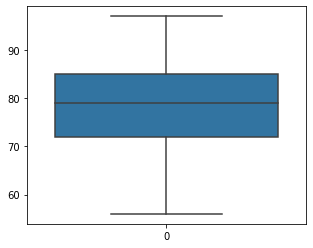

In [19]:
plt.figure(figsize = (5,4))
sns.boxplot(data = df['Temp'])
plt.show()

In [20]:
df.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.302970,-0.530936,0.608742,0.149081,-0.011355
Solar.R,0.302970,1.000000,-0.055245,0.262569,-0.072904,-0.145621
Wind,-0.530936,-0.055245,1.000000,-0.457988,-0.178293,0.027181
Temp,0.608742,0.262569,-0.457988,1.000000,0.420947,-0.130593
Month,0.149081,-0.072904,-0.178293,0.420947,1.000000,-0.007962
Day,-0.011355,-0.145621,0.027181,-0.130593,-0.007962,1.000000


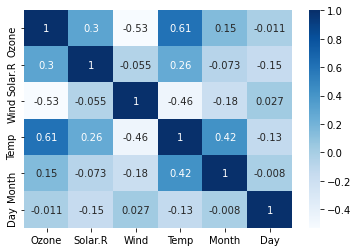

In [22]:
sns.heatmap(df.corr(), cmap = 'Blues', annot=True);

In [23]:
X = df[['Solar.R', 'Wind', 'Temp']]
y = df['Ozone']

In [26]:
X1 = sm.add_constant(X, has_constant = 'add')
X1.head()

,const,Solar.R,Wind,Temp
0,1.0,190.000000,7.4,67
1,1.0,118.000000,8.0,72
2,1.0,149.000000,12.6,74
3,1.0,313.000000,11.5,62
4,1.0,185.931507,14.3,56


In [27]:
# model = sm.OLS(y, X1).fit()
model1 = sm.OLS(y, X1)
result1 = model1.fit()

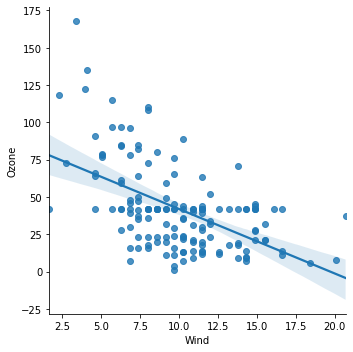

In [30]:
sns.lmplot(y='Ozone', x = 'Wind', data = df)

In [28]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     45.85
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           4.73e-21
Time:                        12:05:05   Log-Likelihood:                -680.14
No. Observations:                 153   AIC:                             1368.
Df Residuals:                     149   BIC:                             1380.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.2232     18.883     -2.024      0.045     -75.537      -0.909
Solar.R        0.0577      0.020      2.883      0.005       0.018       0.097
Wind          -2.7173      0.543     -5.006      0.000      -3.790      -1.645
Temp           1.2413      0.209      5.937      0.000       0.828       1.654
==============================================================================
Omnibus:                       50.473   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.388
Skew:                           1.378   Prob(JB):                     1.61e-27
Kurtosis:                       6.429   Cond. No.                     2.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

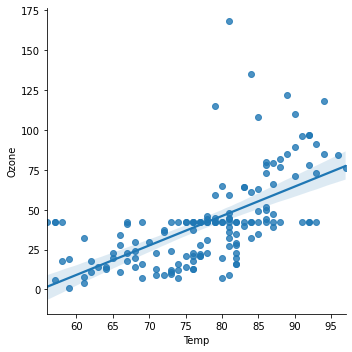

In [31]:
sns.lmplot(y='Ozone', x = 'Temp', data = df)